In [4]:
import re
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
!ls data/raw/images_bboxes.csv

data/raw/images_bboxes.csv


In [3]:
bbox = pd.read_csv("data/raw/images_bboxes.csv")
bbox.dropna(inplace=True)
bbox

,image_id,worm_type,geometry
0,id_8ada71185e18dc8838b4925b.jpg,pbw,"POLYGON ((2478.89 156.77, 2478.89 297.86, 2377..."
1,id_8ada71185e18dc8838b4925b.jpg,pbw,"POLYGON ((939.8199999999999 1221.46, 939.81999..."
2,id_8ada71185e18dc8838b4925b.jpg,abw,"POLYGON ((1559.7 1558.06, 1559.7 1966.3, 1129...."
3,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,POLYGON ((2090.216399557101 1537.2100674812148...
4,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,POLYGON ((2342.2568587778546 1676.304250464547...
...,...,...,...
140228,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2221.63 1777.34, 2221.63 1835.629999..."
140229,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2471.71 1610.92, 2471.71 1685.66, 23..."
140230,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((1819.7 2174.09, 1819.7 2248.83, 1732..."
140231,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2003.5 2445.33, 2003.5 2477.77, 1940..."


In [4]:
train = pd.read_csv("data/raw/Train.csv")
# len(train.image_id_worm.unique())
train = train[train["number_of_worms"]!=0]

In [5]:
train

,image_id_worm,worm_type,number_of_worms
0,id_0002ea6f15c7fa6f4c221783.jpg,pbw,51
1,id_0005ef295aafe6acc63587db.jpg,pbw,8
3,id_00093f2c76f6488737325859.jpg,pbw,12
4,id_000b2e6c437c643f25d4a6c3.jpg,pbw,87
6,id_001149c0de05ea4941d966e0.jpg,abw,5
...,...,...,...
9892,id_ffd6fc216afef2eb42f8e985.jpg,pbw,80
9895,id_ffe6e193dd78b7258d864f6b.jpg,abw,5
9896,id_ffe98feb1e592e887b81c3f0.jpg,pbw,95
9897,id_ffef90ecf47baa38434f84fb.jpg,pbw,26


In [6]:
to_list = lambda i :list(map(float, re.findall(r'\d+\.*\d+', i )))
bbox["bbox_list"] =bbox.geometry.apply(lambda x: to_list(x))
bbox            

,image_id,worm_type,geometry,bbox_list
0,id_8ada71185e18dc8838b4925b.jpg,pbw,"POLYGON ((2478.89 156.77, 2478.89 297.86, 2377...","[2478.89, 156.77, 2478.89, 297.86, 2377.97, 29..."
1,id_8ada71185e18dc8838b4925b.jpg,pbw,"POLYGON ((939.8199999999999 1221.46, 939.81999...","[939.8199999999999, 1221.46, 939.8199999999999..."
2,id_8ada71185e18dc8838b4925b.jpg,abw,"POLYGON ((1559.7 1558.06, 1559.7 1966.3, 1129....","[1559.7, 1558.06, 1559.7, 1966.3, 1129.73, 196..."
3,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,POLYGON ((2090.216399557101 1537.2100674812148...,"[2090.216399557101, 1537.2100674812148, 2090.2..."
4,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,POLYGON ((2342.2568587778546 1676.304250464547...,"[2342.2568587778546, 1676.3042504645477, 2342...."
...,...,...,...,...
140228,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2221.63 1777.34, 2221.63 1835.629999...","[2221.63, 1777.34, 2221.63, 1835.6299999999999..."
140229,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2471.71 1610.92, 2471.71 1685.66, 23...","[2471.71, 1610.92, 2471.71, 1685.66, 2376.28, ..."
140230,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((1819.7 2174.09, 1819.7 2248.83, 1732...","[1819.7, 2174.09, 1819.7, 2248.83, 1732.73, 22..."
140231,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2003.5 2445.33, 2003.5 2477.77, 1940...","[2003.5, 2445.33, 2003.5, 2477.77, 1940.04, 24..."


In [23]:
# bbox_comb = bbox.groupby("image_id")["worm_type","bbox_list"].apply(lambda x: {"abw":list(x[x["worm_type"]=="abw"]["bbox_list"]),"pbw":list(x[x["worm_type"]=="pbw"]["bbox_list"])}).reset_index(name="formatted")
# bbox_comb.columns = ['image_id', 'bbox']                                                                   
# bbox_comb.to_csv("data/detection/bbox_comb.csv",index=False)                                                                   

/tmp/ipykernel_12196/3335579800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bbox_comb = bbox.groupby("image_id")["worm_type","bbox_list"].apply(lambda x: {"abw":list(x[x["worm_type"]=="abw"]["bbox_list"]),"pbw":list(x[x["worm_type"]=="pbw"]["bbox_list"])}).reset_index(name="formatted")


In [7]:
import cv2

In [9]:
"""
ref: https://www.kaggle.com/code/raivokoot/plot-images-bounding-boxes-visualization
"""

def class_to_color(class_id):
    colors = {"abw":(255,0,0),"pbw":(0,255,0)}
    return colors[class_id]
def draw_bounding_box(img, row):
    annotation = row["bbox_list"]
    X = annotation[0::2]
    Y = annotation[1::2]
    
    x_min, y_min = int(min(X)), int(min(Y))
    x_max, y_max = int(max(X)), int(max(Y))
    
    class_id = row['worm_type'] 
    color = class_to_color(class_id)

    cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)
    
def annotate_image(df):
    img_id = df.iloc[0]["image_id"]
    img =cv2.imread(f"data/raw/images/{img_id}")
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    for index, row in df.iterrows():
        draw_bounding_box(img, row)
    print(img.shape)
    plt.imshow(img)
    plt.title(train[train["image_id_worm"]==img_id].iloc[0]["number_of_worms"])
    plt.show()

(4160, 3120, 3)


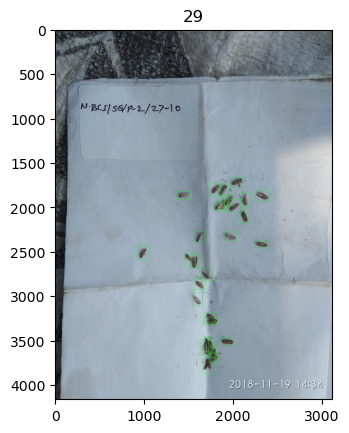

(4000, 3000, 3)


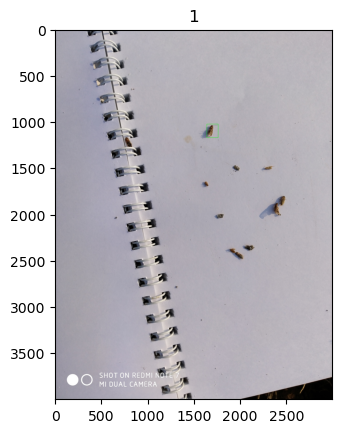

(2448, 3264, 3)


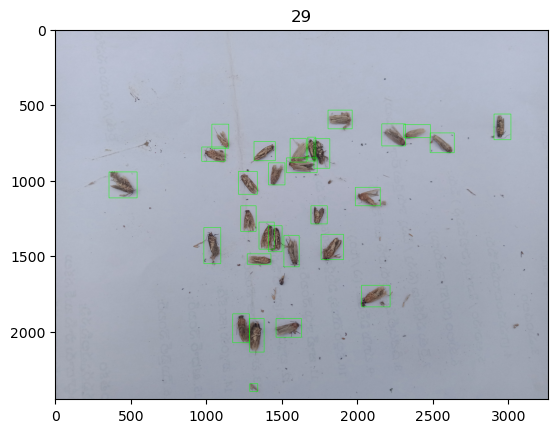

(2160, 3840, 3)


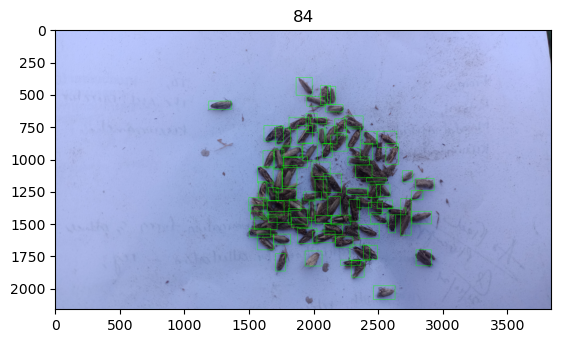

(4160, 3120, 3)


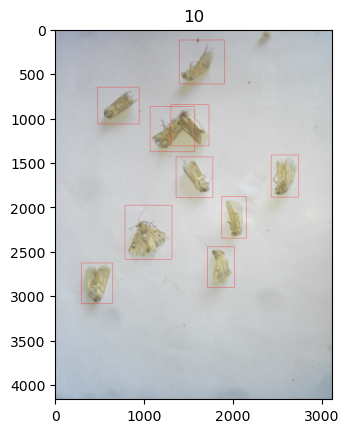

In [30]:
img_ids = random.sample(bbox.image_id.tolist(),5)
for img_id in img_ids:
    df =bbox[bbox["image_id"]==img_id]
    annotate_image(df)

In [318]:
!ls "detection/yolov5/runs/detect/"

bw_150				test_nms0.3_last_highres++_100
dummy				test_nms2__last_highres++_100
ensemble_150_300		test_nms3__last_highres++_100
ensemble_150_3002		test_nms3__last_highres++_1002
ensemble_150_3003		test_nms__last_highres++_100
ensemble_pre_50_300		test_pretrained_last__bw_150
ensemble_pre__last_50_300	test_pretrained_last__bw_1502
exp				test_pretrained_last__bw_300
last__bw_150			val_best_highres++_100
temp				val_best_highres_50
test2.0_last_highres++_aug_100	val_best_highres_obj365_50
test_all_last_highres++_100	val_last__bw_150
test_best_highres++_100		val_last_bw_pretrained_300
test_best_highres++_1002	val_last_highres++_100
test_best_highres_50		val_last_highres++_aug_100
test_best_highres_multires_50	val_last_pre_300
test_last_highres++_100		val_nms0.25_last_highres++_100
test_last_highres++_aug_100	val_nms0.35_last_highres++_100
test_last_highres_50		val_nms0.3_last_highres++_100
test_last_pre_300		val_nms0.3_last_highres++_1002
test_nms0.3_best_highres++_200


In [5]:
import glob
import cv2
import os,random
import matplotlib.pyplot as plt
import numpy as np

data_path ="detection/yolov5/runs/detect/last__bw_150/"
split = "validation"
files = glob.glob(f"{data_path}/labels/*.txt")
len(files)

0

(1024, 768, 3)


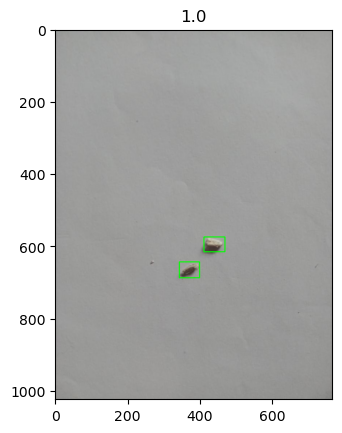

In [322]:
file =files[random.randint(0,len(files))]
with open(file) as fp:
    annotations =np.array([i.split()[:] for i in fp.read().split("\n")[:-1]],dtype=float)
    img = cv2.imread(f"{raw_data}/jpg/{os.path.basename(file)[:-3]}jpg")
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 


    for annotation in annotations:
        draw_bounding_box(img,annotation)
    print(img.shape)
    plt.imshow(img)
    plt.title(annotation[0])
#         plt.show()


In [74]:
img = cv2.imread(f"{data_path}/images/{split}/{os.path.basename(file)[:-3]}jpg")


In [106]:
!ls data/raw/Train.csv
# data_path


SampleSubmission.csv  Train.csv  images.zip
Test.csv	      images	 images_bboxes.csv


In [113]:
import pandas as pd
raw_bbox =pd.read_csv("data/raw/images_bboxes.csv")
raw_bbox

,image_id,worm_type,geometry
0,id_8ada71185e18dc8838b4925b.jpg,pbw,"POLYGON ((2478.89 156.77, 2478.89 297.86, 2377..."
1,id_8ada71185e18dc8838b4925b.jpg,pbw,"POLYGON ((939.8199999999999 1221.46, 939.81999..."
2,id_8ada71185e18dc8838b4925b.jpg,abw,"POLYGON ((1559.7 1558.06, 1559.7 1966.3, 1129...."
3,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,POLYGON ((2090.216399557101 1537.2100674812148...
4,id_bc86d3cfd0c0463fa5cae33e.jpg,abw,POLYGON ((2342.2568587778546 1676.304250464547...
...,...,...,...
140228,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2221.63 1777.34, 2221.63 1835.629999..."
140229,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2471.71 1610.92, 2471.71 1685.66, 23..."
140230,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((1819.7 2174.09, 1819.7 2248.83, 1732..."
140231,id_23617d0cdd8f04091b50106d.jpg,pbw,"POLYGON ((2003.5 2445.33, 2003.5 2477.77, 1940..."


In [ ]:
bbox_comb = pd.read_csv(f"detection/yolov5/detection/bbox_comb.csv")
bbox_comb

In [95]:
import ast
bbox_comb.bbox =bbox_comb.bbox.apply(ast.literal_eval)

In [105]:
bbox_comb.iloc[0,1]['pbw'][0],bbox_comb.iloc[0,1]['pbw'][0][0::2],bbox_comb.iloc[0,1]['pbw'][0][1::2]

([3195.39,
  1829.19,
  3195.39,
  2014.47,
  3101.91,
  2014.47,
  3101.91,
  1829.19,
  3195.39,
  1829.19],
 [3195.39, 3195.39, 3101.91, 3101.91, 3195.39],
 [1829.19, 2014.47, 2014.47, 1829.19, 1829.19])

In [115]:
import cv2


/tmp/ipykernel_9373/591723828.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv2.boundingRect(np.array(bbox_comb.iloc[0,1]['pbw'][0],dtype=np.int))


error: OpenCV(4.6.0) /home/conda/feedstock_root/build_artifacts/libopencv_1666820235487/work/modules/imgproc/src/shapedescr.cpp:874: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'pointSetBoundingRect'


In [131]:
points = np.array(bbox_comb.iloc[0,1]['pbw'][0],dtype= int)
print(points)


[[3195 1829]
 [3195 2014]
 [3101 2014]
 [3101 1829]
 [3195 1829]]


In [129]:
cv2.boundingRect(points)

(3101, 1829, 95, 186)

In [120]:
import cv2
import numpy as np
img = cv2.imread(f"{raw_data}/images/id_23617d0cdd8f04091b50106d.jpg")
img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.imread('star.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
cnt

array([[[2471, 3049]],

       [[2472, 3048]],

       [[2473, 3049]],

       [[2472, 3050]]], dtype=int32)

In [121]:
cv2.boundingRect(cnt)

(2471, 3048, 3, 3)

In [143]:
!ls "data/raw/images"

SampleSubmission.csv  Train.csv  images.zip
Test.csv	      images	 images_bboxes.csv


In [161]:
yolo_data = []
class_wise_bbox = bbox_comb.iloc[0,1]
print(len(class_wise_bbox["pbw"]))
raw_data = "data/raw/"


img_id = bbox_comb.iloc[0,0]
# split = "train"

img_h,img_w,_ =cv2.imread(os.path.join(raw_data,"images",f"{img_id}")).shape


    # raise (e)

for class_type,bboxes in class_wise_bbox.items():
    class_idx = 0 if class_type =="abw" else 1
    for points in bboxes:
        points = np.array(points,dtype= int)
        x_min,y_min,W,H = cv2.boundingRect(np.array([[points[i],points[i+1]] for i in range(0,len(points)-1,2)]))
        x_center =x_min+W/2
        y_center = y_min+H/2 
        x_center /= img_w 
        y_center /=img_h
        W /=img_w
        H /=img_h
        yolo_data.append([class_idx,x_center,y_center,W,H])
yolo_data

51


[[1,
  0.6809039792387543,
  0.5535714285714286,
  0.020544982698961937,
  0.05357142857142857],
 [1,
  0.6972318339100346,
  0.5897177419354839,
  0.034169550173010384,
  0.04233870967741935],
 [1,
  0.7552984429065744,
  0.6074308755760369,
  0.02616782006920415,
  0.043202764976958526],
 [1,
  0.6844723183391004,
  0.5178571428571429,
  0.03027681660899654,
  0.027649769585253458],
 [1,
  0.39835640138408307,
  0.18764400921658986,
  0.04238754325259515,
  0.026785714285714284],
 [1,
  0.606401384083045,
  0.5095046082949308,
  0.039792387543252594,
  0.025921658986175114],
 [1,
  0.4700475778546713,
  0.29161866359447003,
  0.03438581314878893,
  0.04579493087557604],
 [1,
  0.8250432525951558,
  0.49035138248847926,
  0.01384083044982699,
  0.061347926267281104],
 [1,
  0.8197448096885813,
  0.5733006912442397,
  0.03179065743944637,
  0.030817972350230413],
 [1,
  0.6207828719723183,
  0.5879896313364056,
  0.035683391003460206,
  0.04061059907834101],
 [1,
  0.367863321799308,
 

(3472, 4624, 3)


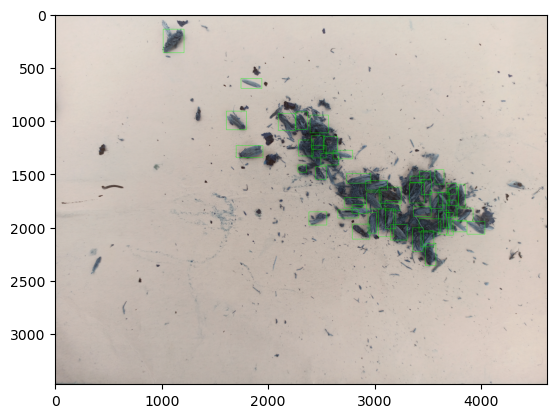

In [174]:

annotations =yolo_data
# img = cv2.imread(f"{raw_data}/images/{os.path.basename(file)[:-3]}jpg")
img =cv2.imread(os.path.join(raw_data,"images",f"{img_id}"))
for annotation in annotations:
    draw_bounding_box(img,annotation)
print(img.shape)
plt.imshow(img)

In [211]:
!ls data/preds/test_filter_preds.csv

data/preds/test_filter_preds.csv


In [212]:
test = pd.read_csv("data/preds/test_filter_preds.csv")
test

,image_id_worm,preds
0,id_00332970f80fa9a47a39516d.jpg,1.0
1,id_0035981bc3ae42eb5b57a317.jpg,1.0
2,id_005102f664b820f778291dee.jpg,1.0
3,id_0066456f5fb2cd858c69ab39.jpg,1.0
4,id_007159c1fa015ba6f394deeb.jpg,0.0
...,...,...
2798,id_ffad8f3773a4222f8fe5ba1a.jpg,1.0
2799,id_ffb65e6de900c49d8f2ef95a.jpg,1.0
2800,id_ffbcb27fa549278f47505515.jpg,0.0
2801,id_ffc0e41e10b0c964d4a02811.jpg,0.0


In [215]:
test = test[test["preds"]!=0]
test.columns = ["img_id","preds"]

In [216]:
test

,img_id,preds
0,id_00332970f80fa9a47a39516d.jpg,1.0
1,id_0035981bc3ae42eb5b57a317.jpg,1.0
2,id_005102f664b820f778291dee.jpg,1.0
3,id_0066456f5fb2cd858c69ab39.jpg,1.0
6,id_00887bebda26184c36e18e00.jpg,1.0
...,...,...
2796,id_ff40ad3bb245a697d799eeef.jpg,1.0
2797,id_ff6b60935a327d1c2779bc5e.jpg,1.0
2798,id_ffad8f3773a4222f8fe5ba1a.jpg,1.0
2799,id_ffb65e6de900c49d8f2ef95a.jpg,1.0


## WBF

In [ ]:
from multiprocessing import Pool
import warnings
warnings.filterwarnings("error")

iou_thr = 0.5
skip_box_thr = 0.001
experiments = ["val_conf0.3_nms0.3_best_highres++_100","val_conf0.4_nms0.4_best_highres++_100"]
img_ids = os.listdir("detection/yolov5/detection/yolo_data/labels/validation/")
raw_data = "data/preproc/"

with Pool(10) as p:
    wbf_processed_data =p.map(get_wbf_bbox,img_ids)
# wbf_processed_data=[get_wbf_bbox(img_ids[i]) for i in range(len(img_ids))]

## Preds

In [376]:
!ls detection/yolov5/runs/detect/

final_1024			   val_best_1536_100_default
final_1024_nms0.3		   val_best_1536_100_nms0.25_conf0.3
final_best_1536			   val_best_1536_100_nms0.3_conf0.3
final_best_1536_nms0.3		   val_best_1536_100_nms0.3_conf0.32
final_last_1536			   val_best_1536_100_nms0.3_conf0.4
initial_last_256_150		   val_best_1536_100_nms0.3_conf0.42
raw_test_best_1536_100		   val_best_2048_50_nms0.3_conf0.3
raw_test_best_2048_100		   val_best_2048_50_nms0.3_conf0.32
raw_test_best_2048_1002		   val_best_2048_50_nms0.3_conf0.35
raw_val_best_1024_100		   val_best_2048_50_nms0.45_conf0.25
raw_val_best_1024_1002		   val_ensemble_best_1536_100_nms0.25_conf0.3
test_best_1536_100_default	   val_ensemble_best_1536_1024_nms0.3_conf0.3
test_best_1536_100_nms0.3_conf0.3  val_ensemble_best_1536_256_nms0.25_conf0.3
test_best_2048_nms0.3_conf0.3	   val_last_640_50
test_initial_last_1024_100	   val_last_highres++_100
test_initial_last_256_150	   val_lowsz_best_1536_100_nms0.3_conf0.3
test_last_640_50


In [378]:
import glob
# exp ="detection/detectron2/output1024/"
files = glob.glob(f"detection/yolov5/runs/detect/final_best_1536_nms0.3/labels/*.txt")
print("files",len(files))
post_process_check = True
if post_process_check: print("post processing")

preds_df = pd.DataFrame(columns=["image_id","worm_type","count"])
for file in tqdm(files):
    with open(file) as fp:
        preds =np.array([i.split()[:] for i in fp.read().split("\n")[:-1]],dtype=float)
        if post_process_check: 
            preds = post_process(preds)
        abw = 0
        pbw =0
        for pred in preds: 
            if int(pred[0])==0: abw+=1
            else: pbw+=1
                
        preds_df.loc[len(preds_df)] = [os.path.basename(file),"abw",abw]
        preds_df.loc[len(preds_df)] = [os.path.basename(file),"pbw",pbw]        
preds_df

files 1938
post processing


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1938/1938 [00:04<00:00, 402.99it/s]


,image_id,worm_type,count
0,id_4c82255d8852816aeb7398ee.txt,abw,1
1,id_4c82255d8852816aeb7398ee.txt,pbw,0
2,id_1eb9693da721e0009f4cdf28.txt,abw,0
3,id_1eb9693da721e0009f4cdf28.txt,pbw,40
4,id_bf53607eb4b7b5a396d2bcc1.txt,abw,5
...,...,...,...
3871,id_fce30484bbbffc7d8172d53c.txt,pbw,1
3872,id_ccb8b56b3e70ba68b15b29a6.txt,abw,4
3873,id_ccb8b56b3e70ba68b15b29a6.txt,pbw,0
3874,id_7c6313d6af64547d5aa40bef.txt,abw,11


In [379]:
len(files)

1938

In [380]:
preds_df[preds_df["count"]!=0].worm_type.value_counts()

pbw    1500
abw     528
Name: worm_type, dtype: int64

In [381]:
!ls data/preds/test_filter_preds.csv

data/preds/test_filter_preds.csv


In [382]:
# preds_df.to_csv("data/preds/yolo_preds.csv",index=False)

In [383]:
!ls data/raw/SampleSubmission.csv

data/raw/SampleSubmission.csv


In [384]:
sub_df =pd.read_csv("data/raw/SampleSubmission.csv")
sub_df

,image_id_worm,number_of_worms
0,id_00332970f80fa9a47a39516d_abw,0
1,id_00332970f80fa9a47a39516d_pbw,0
2,id_0035981bc3ae42eb5b57a317_abw,0
3,id_0035981bc3ae42eb5b57a317_pbw,0
4,id_005102f664b820f778291dee_abw,0
...,...,...
5601,id_ffbcb27fa549278f47505515_pbw,0
5602,id_ffc0e41e10b0c964d4a02811_abw,0
5603,id_ffc0e41e10b0c964d4a02811_pbw,0
5604,id_fff8c253115aacded09ad7ed_abw,0


In [385]:
preds_df["image_id_worm"] = preds_df.apply(lambda x: f"{x['image_id'][:-4]}_{x['worm_type']}",axis=1)
preds_df = preds_df[["image_id_worm","count"]]
preds_df.columns  = ["image_id_worm","number_of_worms"]

preds_df

,image_id_worm,number_of_worms
0,id_4c82255d8852816aeb7398ee_abw,1
1,id_4c82255d8852816aeb7398ee_pbw,0
2,id_1eb9693da721e0009f4cdf28_abw,0
3,id_1eb9693da721e0009f4cdf28_pbw,40
4,id_bf53607eb4b7b5a396d2bcc1_abw,5
...,...,...
3871,id_fce30484bbbffc7d8172d53c_pbw,1
3872,id_ccb8b56b3e70ba68b15b29a6_abw,4
3873,id_ccb8b56b3e70ba68b15b29a6_pbw,0
3874,id_7c6313d6af64547d5aa40bef_abw,11


In [386]:
sub_df = sub_df[["image_id_worm"]].merge(preds_df, on=["image_id_worm"],how='left').fillna(0)


In [387]:
sub_df

,image_id_worm,number_of_worms
0,id_00332970f80fa9a47a39516d_abw,4.0
1,id_00332970f80fa9a47a39516d_pbw,0.0
2,id_0035981bc3ae42eb5b57a317_abw,0.0
3,id_0035981bc3ae42eb5b57a317_pbw,20.0
4,id_005102f664b820f778291dee_abw,9.0
...,...,...
5601,id_ffbcb27fa549278f47505515_pbw,0.0
5602,id_ffc0e41e10b0c964d4a02811_abw,0.0
5603,id_ffc0e41e10b0c964d4a02811_pbw,0.0
5604,id_fff8c253115aacded09ad7ed_abw,0.0


In [388]:
sub_df.to_csv("data/submission/final_post_1536_best_nms0.3.csv",index=False)

## Postprocess bbox

In [339]:
def post_process(data):
#     wrong_arr= []

#     for i in range(len(data)-1):
#         for j in range(i+1,len(data)):
#             first = np.array([data[i][1]-data[i][3]/2,data[i][2]-data[i][4]/2])
#             second = np.array([data[j][1]-data[j][3]/2,data[j][2]-data[j][4]/2])
#             if np.linalg.norm(first-second) <0.01:
#                 if i not in wrong_arr:
#                     wrong_arr.append(i)
#     data = np.delete(data, wrong_arr,axis=0)
    wrong_arr=[]
    # check area
    areas = []
    for i in range(len(data)):
        areas.append(data[i][3]*data[i][4])
#     print("fdgfg",len(areas))
    mean_area  = np.mean(areas)
    for i in range(len(areas)):
        if areas[i]<mean_area*0.5:
            wrong_arr.append(i)
            
    data = np.delete(data, wrong_arr,axis=0)
    return data
                

## Error analysis

In [180]:
!ls detection/yolov5/runs/detect/

initial_last_256_150		   val_best_1536_100_nms0.3_conf0.4
raw_test_best_1536_100		   val_best_1536_100_nms0.3_conf0.42
raw_val_best_1024_100		   val_best_2048_50_nms0.3_conf0.3
raw_val_best_1024_1002		   val_best_2048_50_nms0.3_conf0.32
test_best_1536_100_default	   val_best_2048_50_nms0.3_conf0.35
test_best_1536_100_nms0.3_conf0.3  val_best_2048_50_nms0.45_conf0.25
test_initial_last_1024_100	   val_ensemble_best_1536_100_nms0.25_conf0.3
test_initial_last_256_150	   val_ensemble_best_1536_1024_nms0.3_conf0.3
test_last_640_50		   val_ensemble_best_1536_256_nms0.25_conf0.3
val_best_1536_100_default	   val_last_640_50
val_best_1536_100_nms0.25_conf0.3  val_last_highres++_100
val_best_1536_100_nms0.3_conf0.3   val_lowsz_best_1536_100_nms0.3_conf0.3
val_best_1536_100_nms0.3_conf0.32


In [169]:
def txt2df(path,post_process_check=True):
    files = glob.glob(path+"/*.txt")
    df = pd.DataFrame(columns=["image_id","worm_type","count"])
    if post_process_check: print("post_processing")
    for file in files:
        with open(file) as fp:
            preds =np.array([i.split()[:] for i in fp.read().split("\n")[:-1]],dtype=float)
            if post_process_check: 
                preds = post_process(preds)
            abw = 0
            pbw =0
            for pred in preds: 
                if int(pred[0])==0: abw+=1
                else: pbw+=1

            df.loc[len(df)] = [os.path.basename(file),"abw",abw]
            df.loc[len(df)] = [os.path.basename(file),"pbw",pbw]
    return df


In [182]:
exp  = "val_best_2048_50_nms0.3_conf0.35"
post_preds_df =txt2df(f"detection/yolov5/runs/detect/{exp}/labels")
post_preds_df

post_processing


,image_id,worm_type,count
0,id_095efeae209e071b85c680ce.txt,abw,0
1,id_095efeae209e071b85c680ce.txt,pbw,49
2,id_062e434219b5a3612a414996.txt,abw,0
3,id_062e434219b5a3612a414996.txt,pbw,5
4,id_07741c21ea0cf05171f394ac.txt,abw,0
...,...,...,...
1279,id_22a36dae9a130ff5d7751e93.txt,pbw,28
1280,id_c6af05f4d28a2f31f2735e7d.txt,abw,0
1281,id_c6af05f4d28a2f31f2735e7d.txt,pbw,1
1282,id_bddefe14f422e0ab79aec5b2.txt,abw,1


In [183]:
preds_df =txt2df(f"detection/yolov5/runs/detect/{exp}/labels",post_process_check=False)
preds_df

,image_id,worm_type,count
0,id_095efeae209e071b85c680ce.txt,abw,0
1,id_095efeae209e071b85c680ce.txt,pbw,52
2,id_062e434219b5a3612a414996.txt,abw,0
3,id_062e434219b5a3612a414996.txt,pbw,5
4,id_07741c21ea0cf05171f394ac.txt,abw,0
...,...,...,...
1279,id_22a36dae9a130ff5d7751e93.txt,pbw,30
1280,id_c6af05f4d28a2f31f2735e7d.txt,abw,0
1281,id_c6af05f4d28a2f31f2735e7d.txt,pbw,1
1282,id_bddefe14f422e0ab79aec5b2.txt,abw,1


In [184]:
og_df = txt2df("detection/yolov5/detection/yolo_data/labels/validation",post_process_check=False)
og_df 

,image_id,worm_type,count
0,id_095efeae209e071b85c680ce.txt,abw,0
1,id_095efeae209e071b85c680ce.txt,pbw,55
2,id_062e434219b5a3612a414996.txt,abw,0
3,id_062e434219b5a3612a414996.txt,pbw,5
4,id_07741c21ea0cf05171f394ac.txt,abw,0
...,...,...,...
1291,id_22a36dae9a130ff5d7751e93.txt,pbw,35
1292,id_c6af05f4d28a2f31f2735e7d.txt,abw,0
1293,id_c6af05f4d28a2f31f2735e7d.txt,pbw,2
1294,id_bddefe14f422e0ab79aec5b2.txt,abw,4


In [185]:
set(og_df.image_id) - set(preds_df.image_id)

{'id_1c0bf022575685dd72c641bf.txt',
 'id_2dee1137f0e2c8e2142bb298.txt',
 'id_4f8b845554c16eee06f32088.txt',
 'id_97aad3b82d2b9fb16228ff84.txt',
 'id_e38518842eb5a8e48aba94e6.txt',
 'id_fe2551bd9f55c490d84ecdbd.txt'}

In [186]:
merged_df1 = preds_df.merge(og_df,on=["image_id","worm_type"])
merged_df1.columns = ["image_id","worm_type","pred_count","count"]

merged_df2 = post_preds_df.merge(og_df,on=["image_id","worm_type"])
merged_df2.columns = ["image_id","worm_type","pred_count","count"]

merged_df1

,image_id,worm_type,pred_count,count
0,id_095efeae209e071b85c680ce.txt,abw,0,0
1,id_095efeae209e071b85c680ce.txt,pbw,52,55
2,id_062e434219b5a3612a414996.txt,abw,0,0
3,id_062e434219b5a3612a414996.txt,pbw,5,5
4,id_07741c21ea0cf05171f394ac.txt,abw,0,0
...,...,...,...,...
1279,id_22a36dae9a130ff5d7751e93.txt,pbw,30,35
1280,id_c6af05f4d28a2f31f2735e7d.txt,abw,0,0
1281,id_c6af05f4d28a2f31f2735e7d.txt,pbw,1,2
1282,id_bddefe14f422e0ab79aec5b2.txt,abw,1,4


In [187]:
merged_df1["diff"] = merged_df1.apply(lambda x: abs(x["count"]-x["pred_count"]), axis=1)
merged_df1

,image_id,worm_type,pred_count,count,diff
0,id_095efeae209e071b85c680ce.txt,abw,0,0,0
1,id_095efeae209e071b85c680ce.txt,pbw,52,55,3
2,id_062e434219b5a3612a414996.txt,abw,0,0,0
3,id_062e434219b5a3612a414996.txt,pbw,5,5,0
4,id_07741c21ea0cf05171f394ac.txt,abw,0,0,0
...,...,...,...,...,...
1279,id_22a36dae9a130ff5d7751e93.txt,pbw,30,35,5
1280,id_c6af05f4d28a2f31f2735e7d.txt,abw,0,0,0
1281,id_c6af05f4d28a2f31f2735e7d.txt,pbw,1,2,1
1282,id_bddefe14f422e0ab79aec5b2.txt,abw,1,4,3


In [188]:
merged_df2["diff"] = merged_df2.apply(lambda x: abs(x["count"]-x["pred_count"]), axis=1)
merged_df2

,image_id,worm_type,pred_count,count,diff
0,id_095efeae209e071b85c680ce.txt,abw,0,0,0
1,id_095efeae209e071b85c680ce.txt,pbw,49,55,6
2,id_062e434219b5a3612a414996.txt,abw,0,0,0
3,id_062e434219b5a3612a414996.txt,pbw,5,5,0
4,id_07741c21ea0cf05171f394ac.txt,abw,0,0,0
...,...,...,...,...,...
1279,id_22a36dae9a130ff5d7751e93.txt,pbw,28,35,7
1280,id_c6af05f4d28a2f31f2735e7d.txt,abw,0,0,0
1281,id_c6af05f4d28a2f31f2735e7d.txt,pbw,1,2,1
1282,id_bddefe14f422e0ab79aec5b2.txt,abw,1,4,3


In [189]:
thr = 10
len(merged_df1[merged_df1["diff"]>thr]),len(merged_df2[merged_df1["diff"]>thr])

(27, 27)

In [191]:
merged_df2.describe()

,pred_count,count,diff
count,1284.000000,1284.000000,1284.000000
mean,9.778816,10.252336,1.266355
std,28.668791,30.933467,6.458266
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,6.000000,7.000000,0.000000
max,382.000000,453.000000,102.000000


In [63]:
# merged_df2[merged_df2["diff"]>thr]

In [114]:
set(merged_df2[merged_df2["diff"]>thr].image_id)-set(merged_df1[merged_df1["diff"]>thr].image_id)

{'id_58ff1c216fa5ebb9ae20be5d.txt'}

In [1427]:
# !ls detection/yolov5/runs/pretrained/bw_win_1024_50/bw_win_1024_50_thr5_wrong_counts.csv
# bw_win_1024_50_thr5_wrong_counts_filter++_postproces++.csv

In [240]:
run = "bw_win_1024_50"
merged_df2[merged_df2["diff"]>thr].to_csv(f"detection/yolov5/runs/pretrained/{run}/{run}_nms0.3_thr{thr}_wrong_counts_filter++_postproces++.csv",index=False)



In [1430]:
# df1 = pd.read_csv("detection/yolov5/runs/pretrained/bw_win_1024_50/bw_win_1024_50_thr5_wrong_counts_filter++_postproces++.csv")
# df2 = pd.read_csv("detection/yolov5/runs/pretrained/bw_win_1024_50/bw_win_1024_50_thr5_wrong_counts.csv")

In [1563]:
# df1.columns =['image_id', 'worm_type', 'pred_count', 'count', 'diff1']
# df2.columns =['image_id', 'worm_type', 'pred_count', 'count', 'diff2']
# df1.merge(df2, on="image_id")[["image_id","count_x","pred_count_x","pred_count_y"]]

In [24]:
!ls detection/yolov5/runs/detect/

initial_last_256_150		   test_last_640_50
raw_val_best_1024_100		   val_best_1536_100_nms0.3_conf0.3
raw_val_best_1024_1002		   val_best_1536_100_nms0.3_conf0.32
test_best_1536_100_nms0.3_conf0.3  val_last_640_50
test_initial_last_1024_100	   val_last_highres++_100
test_initial_last_256_150


In [7]:
def infer(file,plot_img=False,post_process_check=False):
    with open(file) as fp:
        annotations =np.array([i.split()[:] for i in fp.read().split("\n")[:-1]],dtype=float)
        if post_process_check: 
                annotations = post_process(annotations)
        img = cv2.imread(f"{raw_data}/jpg/{os.path.basename(file)[:-3]}jpg")
        img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        if plot_img:
            plt.imshow(img)
            plt.show()
        print(annotations[0])
        for annotation in annotations:
            draw_bounding_box(img,annotation)
        print(img.shape)
      
        plt.imshow(img)
        plt.title(len(annotations))
        plt.show()

In [8]:
exp ="test_best_1536_100_nms0.3_conf0.3"

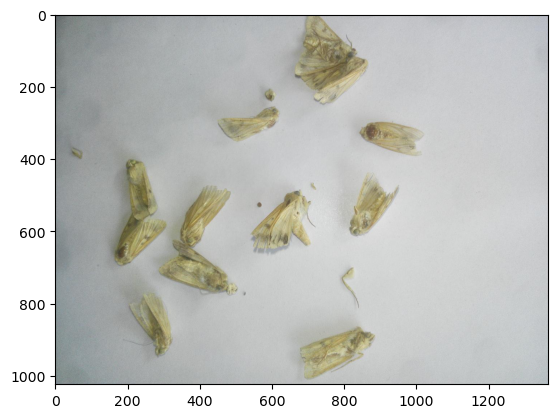

[0.        0.17619   0.473633  0.0915751 0.193359  0.901662 ]
(1024, 1365, 3)


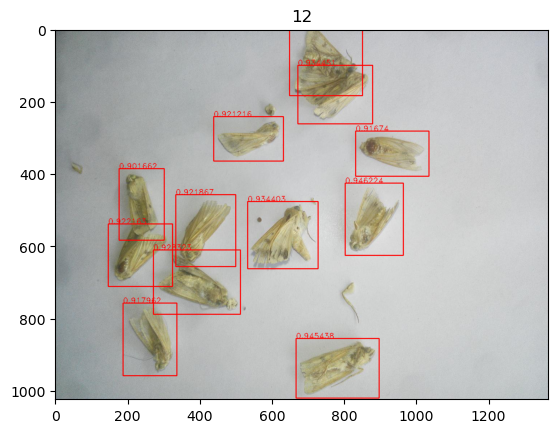

NameError: name 'post_process' is not defined

In [11]:
img_id = "id_9f2f4c1e39090ad2ce2a4d4f.txt"

pred_file = infer(f"detection/yolov5/runs/detect/{exp}/labels/{img_id}",plot_img=True)
pred_file = infer(f"detection/yolov5/runs/detect/{exp}/labels/{img_id}",post_process_check=True)

og_file = infer(f"detection/yolov5/detection/yolo_data/labels/validation/{img_id}")


    
#         plt.show()


In [482]:
def plot_same(pred_file,og_file,plot_img=False,post_process_check=False):
    with open(pred_file) as fp:
        fp2 = open(og_file)
        pred_annotations =np.array([i.split()[:] for i in fp.read().split("\n")[:-1]],dtype=float)
        og_annotations = np.array([i.split()[:] for i in fp2.read().split("\n")[:-1]],dtype=float)
        if post_process_check: 
                annotations = post_process(annotations)
        img = cv2.imread(f"{raw_data}/jpg/{os.path.basename(pred_file)[:-3]}jpg")
        img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        if plot_img:
            plt.imshow(img)
            plt.show()
        cnt=len(pred_annotations)
        for annotation in pred_annotations:
            first = np.array([annotation[1]-annotation[3]/2,annotation[2]-annotation[4]/2])
            for og_annotation in og_annotations:
                second = np.array([og_annotation[1]-og_annotation[3]/2,og_annotation[2]-og_annotation[4]/2])
                dist= np.linalg.norm(first-second)
                if dist <=0.01:
                    annotation[0] = 2
                    cnt-=1
            draw_bounding_box(img,annotation,filter_bbox=True)
        print(img.shape)
        print("different bbox count",cnt)
      
        plt.imshow(img)
        plt.title(len(pred_annotations))
        plt.show()

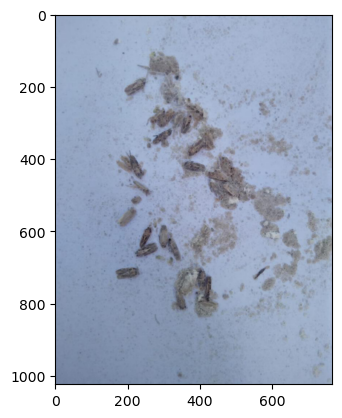

(1024, 768, 3)
different bbox count 10


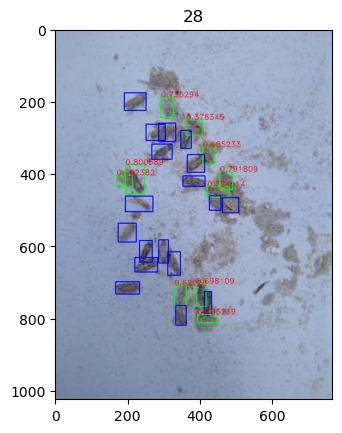

[1.       0.500521 0.407813 0.078125 0.029687]
(1024, 768, 3)


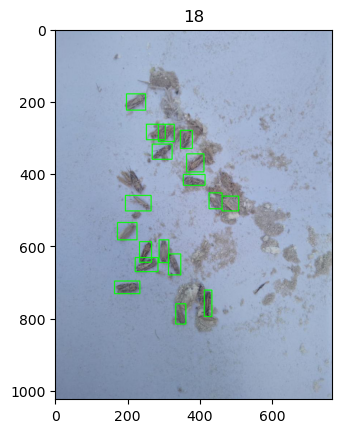

In [795]:
img_id = "id_33bb5990a23f85a20c37d6f2.txt"

pred_path =f"detection/yolov5/runs/detect/{exp}/labels/{img_id}"
og_path =f"detection/yolov5/detection/yolo_data/labels/validation/{img_id}"

plot_same(pred_path,og_path,plot_img=True)


og_file = infer(og_path)



## WBF

In [1]:
from ensemble_boxes import weighted_boxes_fusion
import re
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
# pred_path =f"detection/yolov5/runs/detect/{exp}/labels/{img_id}"
# og_path =f"detection/yolov5/detection/yolo_data/labels/validation/{img_id}"


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [16]:
# len(wbf_processed_data[0][0])
len(wbf_processed_data)

648

In [17]:
def infer(data,plot_img=False,post_process_check=False):
    img_id= data["img_id"].split(".")[0]
    annotations =data["annontations"]
    if post_process_check: 
            annotations = post_process(annotations)
    img = cv2.imread(f"{raw_data}/jpg/{img_id}.jpg")
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    if plot_img:
        plt.imshow(img)
        plt.show()
    for annotation in annotations:
        annotation = list(map(float,annotation.split()))
#         print(annotation)
        draw_bounding_box(img,annotation)
    print(img.shape)

    plt.imshow(img)
    plt.title(len(annotations))
    plt.show()

(1024, 768, 3)


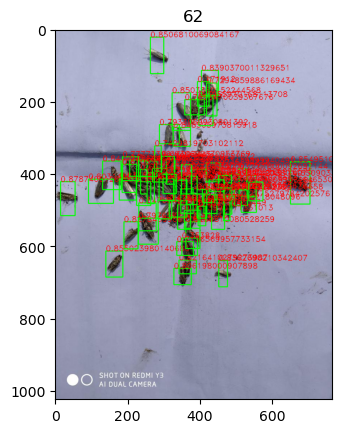

In [20]:
infer(wbf_processed_data[0])

In [28]:
wbf_preds = pd.DataFrame([{"img_id":data["img_id"],"count":len(data["annontations"])} for data in wbf_processed_data])

In [33]:
og_df = txt2df("detection/yolov5/detection/yolo_data/labels/validation",post_process_check=False)
og_df 

,image_id,worm_type,count
0,id_095efeae209e071b85c680ce.txt,abw,0
1,id_095efeae209e071b85c680ce.txt,pbw,55
2,id_062e434219b5a3612a414996.txt,abw,0
3,id_062e434219b5a3612a414996.txt,pbw,5
4,id_07741c21ea0cf05171f394ac.txt,abw,0
...,...,...,...
1291,id_22a36dae9a130ff5d7751e93.txt,pbw,35
1292,id_c6af05f4d28a2f31f2735e7d.txt,abw,0
1293,id_c6af05f4d28a2f31f2735e7d.txt,pbw,2
1294,id_bddefe14f422e0ab79aec5b2.txt,abw,4


In [289]:
!ls data/raw/

SampleSubmission.csv  Train.csv  images.zip
Test.csv	      images	 images_bboxes.csv


In [298]:
import ast
bbox = pd.read_csv("data/preproc/bbox_comb.csv")

bbox.bbox = bbox.bbox.apply(ast.literal_eval)
# b = bbox.bbox.apply(lambda x: print("p") if not isinstance(x,dict) else "l")
bbox

,image_id,bbox
0,id_0002ea6f15c7fa6f4c221783.jpg,"{'abw': [], 'pbw': [[3195.39, 1829.19, 3195.39..."
1,id_0005ef295aafe6acc63587db.jpg,"{'abw': [], 'pbw': [[1685.22, 2631.2, 1685.22,..."
2,id_00093f2c76f6488737325859.jpg,"{'abw': [], 'pbw': [[2131.8199999999997, 606.3..."
3,id_000b2e6c437c643f25d4a6c3.jpg,"{'abw': [], 'pbw': [[1706.9618768284392, 2570...."
4,id_001149c0de05ea4941d966e0.jpg,"{'abw': [[1101.0, 1091.0, 1101.0, 1720.0, 651...."
...,...,...
6474,id_ffd6fc216afef2eb42f8e985.jpg,"{'abw': [], 'pbw': [[1991.0, 454.0, 1991.0, 68..."
6475,id_ffe6e193dd78b7258d864f6b.jpg,"{'abw': [[1712.0, 1133.0, 1712.0, 1730.0, 1336..."
6476,id_ffe98feb1e592e887b81c3f0.jpg,"{'abw': [], 'pbw': [[541.1099999999999, 431.73..."
6477,id_ffef90ecf47baa38434f84fb.jpg,"{'abw': [], 'pbw': [[1547.0, 859.0, 1547.0, 10..."


In [301]:
raw = pd.read_csv("data/raw/images_bboxes.csv")
# raw.columns = ["image_id"]
# raw[raw["number_of_worms"]==0]
len(set(raw.image_id.unique())-set(raw.dropna().image_id.unique()))

3258

In [285]:
cnt =0
merge = raw.merge(bbox, on=["image_id"],how="left").fillna(0)
# merge[merge["bbox"]==0] 
merge


,image_id,bbox
0,id_0002ea6f15c7fa6f4c221783.jpg,"{'abw': [], 'pbw': [[3195.39, 1829.19, 3195.39..."
1,id_0005ef295aafe6acc63587db.jpg,"{'abw': [], 'pbw': [[1685.22, 2631.2, 1685.22,..."
2,id_00084298dd030a500033ff78.jpg,0
3,id_00093f2c76f6488737325859.jpg,"{'abw': [], 'pbw': [[2131.8199999999997, 606.3..."
4,id_000b2e6c437c643f25d4a6c3.jpg,"{'abw': [], 'pbw': [[1706.9618768284392, 2570...."
...,...,...
9895,id_ffe6e193dd78b7258d864f6b.jpg,"{'abw': [[1712.0, 1133.0, 1712.0, 1730.0, 1336..."
9896,id_ffe98feb1e592e887b81c3f0.jpg,"{'abw': [], 'pbw': [[541.1099999999999, 431.73..."
9897,id_ffef90ecf47baa38434f84fb.jpg,"{'abw': [], 'pbw': [[1547.0, 859.0, 1547.0, 10..."
9898,id_fff06bb2e59bfce437ac9fc0.jpg,0


In [264]:
len(set(raw.image_id)-set(bbox.image_id))

3258